In [1]:
import numpy as np
import numpy.linalg as nl
import scipy.linalg as sl
import scipy.integrate as si
import matplotlib.pyplot as plt

In [2]:
def xj(J, L):
    h = L/J
    return np.arange(-J, J+1) * h

In [3]:
# function we are trying to approximate
def v(x, choice=4):
    if choice == 0:
        # dimensionless quantum harmonic oscillator potential
        return 0.5 * x**2
    elif choice == 1:
        # symmetric double well potential
        return 0.0025 * (x ** 2 - 25) ** 2
    elif choice == 2:
        # asymmetric double well potential
        return 0.0003 * ((x - 3) ** 4 + 10 * (x - 5) ** 3)
    elif choice == 3:
        # soft coulomb potential
        return -1 / np.sqrt(x ** 2 + 0.25)
    elif choice == 4:
        # a complicated function made by Harish
        return np.cos(x**2) - x*np.sin(x)
    else:
        print('Function v(x, choice=0): Did not recognise your input for choice.')

In [4]:
# define Gaussian basis function
# Gaussian centered at grid point j*h with shape parameter alpha
# x can be a vector
def gb(x, j, h, alpha):
    return np.exp(-alpha * (x - j*h)** 2)

def gbm(x, alpha):
    return np.exp(-alpha * x** 2)

In [39]:
# function for computing the L2 error given some number of basis
def loopfn(J, L, alpha):
    h = L/J

    # make vector of xj values
    xjvec = xj(J, L)
    # make arrays that can be used in vectorized evaluations
    xj1, xj2 = np.meshgrid(xjvec, xjvec)

    # make Gaussian basis matrix.
    # We want gbmat @ gbcfs = vtrue, so each row in gbmat is
    # all the Gaussian basis for one value of x
    gbmat = gbm(xj1 - xj2, alpha)

    # compute vector of the function evaluated on grid
    vxjtrue = v(xjvec)

    # use solve to compute basis coefficients
    coef = sl.solve(gbmat, vxjtrue, assume_a='sym')

    # reconstruct function from coefficients
    vxjprdt = gbmat @ coef

    # function representation of L2 norm
    def integrand(x):
        xm, xim = np.meshgrid(xjvec, x)
        thisg = gbm(xm - xim, alpha)
        return np.square(thisg @ coef - v(x))


    # integrate to get the square of the L2 error
    l2errsq, _ = si.quadrature(integrand, -L, L, maxiter=500, tol=1e-8, rtol=1e-8)
    return [xjvec, vxjtrue, vxjprdt, np.sqrt(l2errsq), h]

/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/3386804832.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.19607e-20): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


(1, 201)
(1, 201)
(2, 201)
(2, 201)
(3, 201)
(3, 201)
(4, 201)
(4, 201)
(5, 201)
(5, 201)
(6, 201)
(6, 201)
(7, 201)
(7, 201)
(8, 201)
(8, 201)
(9, 201)
(9, 201)


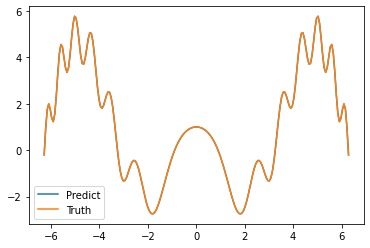

L2 Error: 0.0001399555132323139 h value: 0.06283185307179587


In [40]:
xjvec, vxjtrue, vxjprdt, l2err, hval = loopfn(J=100, L=2*np.pi, alpha=3.0)

# plot the truth vs reconstruction
plt.plot(xjvec, vxjprdt, label='Predict')
plt.plot(xjvec, vxjtrue, label='Truth')
plt.legend()
plt.show()

print(f'L2 Error: {l2err}', f'h value: {hval}')

---

In [34]:
# set number of loops
lpnum = 10

# initialize array for storing results
resultvec = []

# main loop
for i in np.arange(lpnum, step=0.5):
    print(f'Computing Result {i+1} of {lpnum}')
    forJ = 2**(3 + i)
    resultvec.append(loopfn(J=forJ, L=2*np.pi, alpha=3.0))

resultvec = np.array(resultvec, dtype=object)
print(resultvec.shape)

Computing Result 1.0 of 10
Computing Result 1.5 of 10
Computing Result 2.0 of 10
Computing Result 2.5 of 10
Computing Result 3.0 of 10
Computing Result 3.5 of 10
Computing Result 4.0 of 10
Computing Result 4.5 of 10
Computing Result 5.0 of 10
Computing Result 5.5 of 10
Computing Result 6.0 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.62085e-19): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.96793e-19): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.32735e-20): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=2.0815e-20): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcon

Computing Result 6.5 of 10
Computing Result 7.0 of 10
Computing Result 7.5 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=6.05131e-21): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.05174e-21): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


Computing Result 8.0 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.07328e-21): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


Computing Result 8.5 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=3.30016e-22): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


Computing Result 9.0 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.88035e-21): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


Computing Result 9.5 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.63333e-22): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


Computing Result 10.0 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=4.27289e-22): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


Computing Result 10.5 of 10


/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_73236/612653428.py:19: LinAlgWarning: Ill-conditioned matrix (rcond=1.41637e-22): result may not be accurate.
  coef = sl.solve(gbmat, vxjtrue, assume_a='sym')


(20, 5)


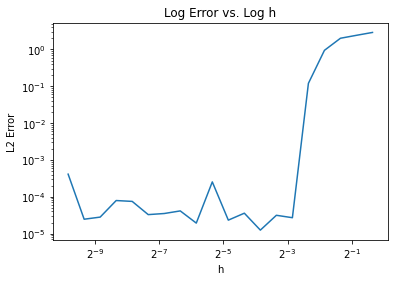

In [36]:
plt.loglog(resultvec[:,-1], resultvec[:,-2])
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.title('Log Error vs. Log h')
plt.xlabel('h')
plt.ylabel('L2 Error')
plt.show()
#plt.savefig('./order-of-accuracy-results/error-vs-h-plot.pdf')